In [40]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Data Set/mental_health_workplace_survey.csv")  # Replace with your local file path if needed

# Preview first few rows
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [ ]:
# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()

Total Rows: 3000
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  Physi

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


In [ ]:
# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


In [ ]:
# Handle numeric columns (int/float)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)  # Replaces missing values with median
    print(f"Filled missing values in {col} with median: {median_val}")

# Handle categorical columns (object/string)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)    # Replaces missing values with most frequent value
    print(f"Filled missing values in {col} with mode: {mode_val}")

Filled missing values in EmployeeID with median: 2500.5
Filled missing values in Age with median: 41.0
Filled missing values in YearsAtCompany with median: 10.0
Filled missing values in WorkHoursPerWeek with median: 45.0
Filled missing values in BurnoutLevel with median: 5.48
Filled missing values in JobSatisfaction with median: 5.43
Filled missing values in StressLevel with median: 5.495
Filled missing values in ProductivityScore with median: 5.49
Filled missing values in SleepHours with median: 6.6
Filled missing values in PhysicalActivityHrs with median: 5.0
Filled missing values in CommuteTime with median: 59.0
Filled missing values in ManagerSupportScore with median: 5.44
Filled missing values in MentalHealthDaysOff with median: 5.0
Filled missing values in WorkLifeBalanceScore with median: 5.425
Filled missing values in TeamSize with median: 25.0
Filled missing values in CareerGrowthScore with median: 5.58
Filled missing values in BurnoutRisk with median: 0.0
Filled missing value

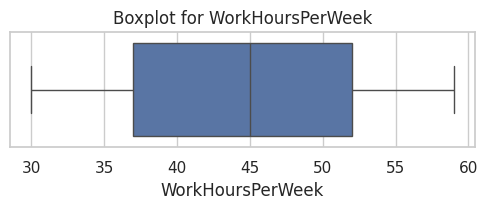

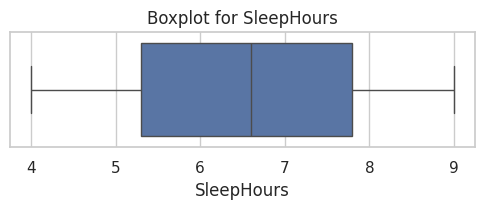

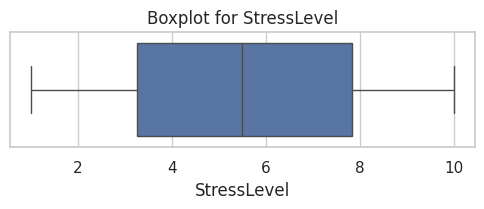

In [ ]:
# Plot boxplots for key numeric features
features = ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df

# Remove outliers from important features
for col in ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)


0 outliers removed from 'WorkHoursPerWeek'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


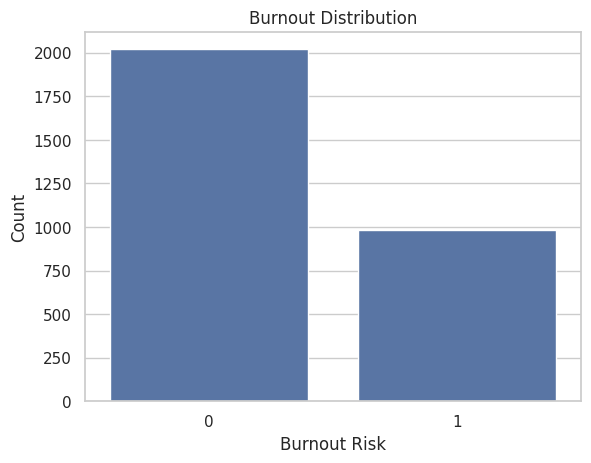

In [ ]:
# Burnout counts
sns.countplot(x='BurnoutRisk', data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout Risk")
plt.ylabel("Count")
plt.show()


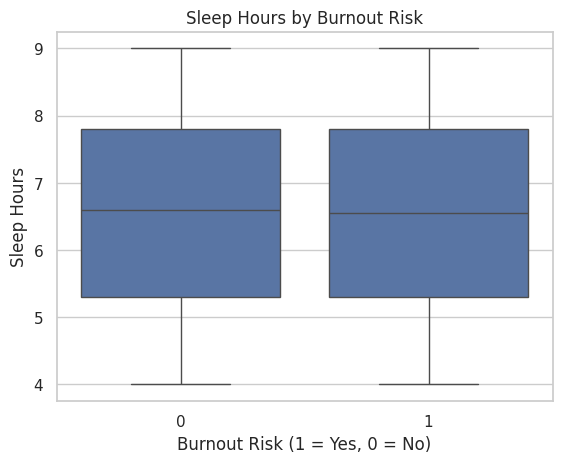

In [ ]:
sns.boxplot(x='BurnoutRisk', y='SleepHours', data=df)
plt.title("Sleep Hours by Burnout Risk")
plt.xlabel("Burnout Risk (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.show()

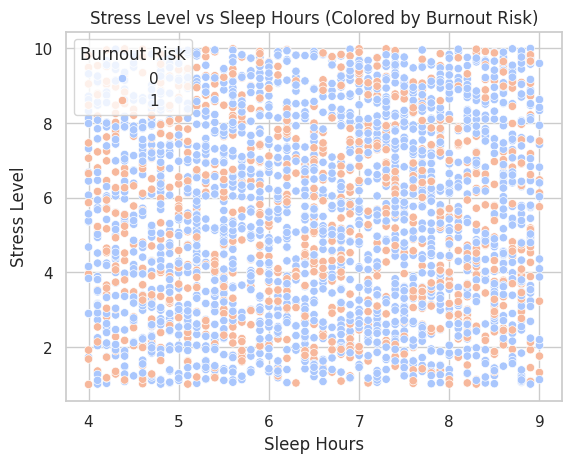

In [ ]:
sns.scatterplot(x='SleepHours', y='StressLevel', hue='BurnoutRisk', data=df, palette='coolwarm')
plt.title("Stress Level vs Sleep Hours (Colored by Burnout Risk)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.legend(title="Burnout Risk")
plt.show()

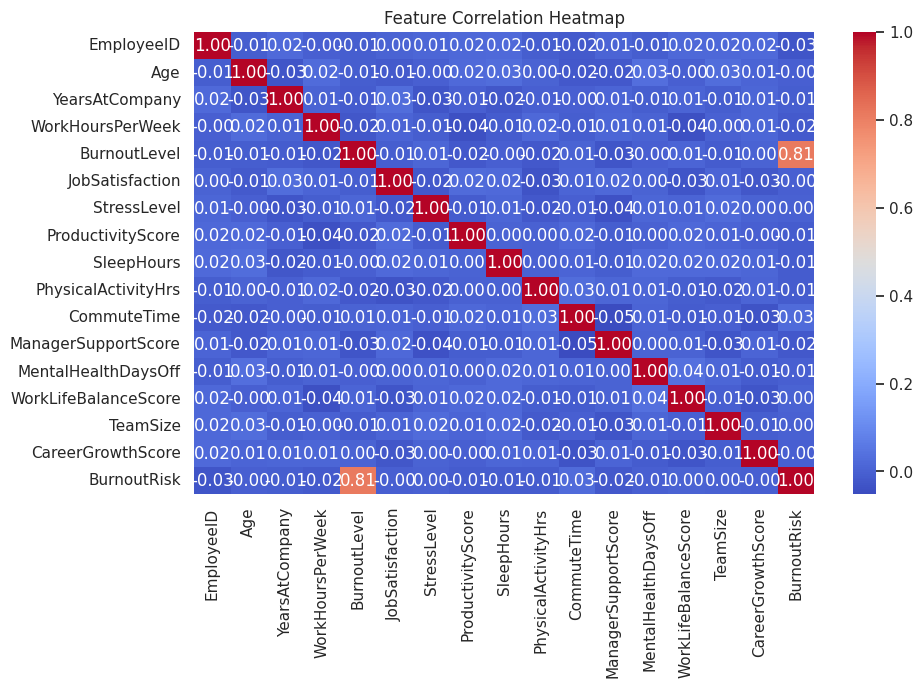

In [28]:

df_numerical = df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
# Save cleaned dataset for later use
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [30]:
# Create interaction features
df['Stress_Work'] = df['StressLevel'] * df['WorkHoursPerWeek']
df['Sleep_Stress'] = df['StressLevel'] * df['SleepHours']

In [33]:
# Feature selection using mutual information
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['StressLevel']).columns.tolist()
mi_scores = mutual_info_regression(df[numeric_cols], df['StressLevel'])
mi_series = pd.Series(mi_scores, index=numeric_cols)
top_numeric_features = mi_series.sort_values(ascending=False).head(5).index.tolist()

In [34]:
# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Final selected features (avoid duplicates)
interaction_features = ['Stress_Work', 'Sleep_Stress']
numeric_features = list(sorted(set(top_numeric_features + interaction_features)))
selected_features = numeric_features + categorical_cols  # No duplicates

In [35]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
])

In [36]:
# Train-test split
X = df[selected_features]
y = df['StressLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Models
models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=1.0),
    "LassoRegression": Lasso(alpha=0.1)
}

In [41]:
# Training and evaluation
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_score = pipeline.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {
        'R²': round(r2_score, 4),
        'MSE': round(mse, 4)
    }

# Print results
print("Model Performance on Test Set:")
for name, metrics in results.items():
    print(f"{name}: R² = {metrics['R²']}, MSE = {metrics['MSE']}")


Model Performance on Test Set:
LinearRegression: R² = 0.9601, MSE = 0.2646
RidgeRegression: R² = 0.96, MSE = 0.2647
LassoRegression: R² = 0.953, MSE = 0.311


In [42]:
# Summary
best_model = max(results.items(), key=lambda x: x[1]['R²'])
print("\nSummary:")
print(f"The best performing model was {best_model[0]} with R² score of {best_model[1]['R²']} and MSE of {best_model[1]['MSE']}.")
print("Regularized models (Ridge/Lasso) often perform better when there are many features or potential multicollinearity.")
print("The interaction features (Stress_Work and Sleep_Stress) likely helped capture non-linear relationships.")
print("Feature scaling and proper encoding of categorical variables contributed to the model performance.")


Summary:
The best performing model was LinearRegression with R² score of 0.9601 and MSE of 0.2646.
Regularized models (Ridge/Lasso) often perform better when there are many features or potential multicollinearity.
The interaction features (Stress_Work and Sleep_Stress) likely helped capture non-linear relationships.
Feature scaling and proper encoding of categorical variables contributed to the model performance.
